In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow import keras

In [33]:
df = pd.read_csv("data/HousingData.csv")

# Remove colunas categóricas (CHAS) ou transforma depois
df = df.drop(columns=["CHAS"], errors="ignore")

# Trata valores ausentes (muito comum nesse dataset)
df.fillna(df.mean(numeric_only=True), inplace=True)

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    int64  
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB
None
             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.554695    6.284634   68.518519   
std      8.545770   22.92

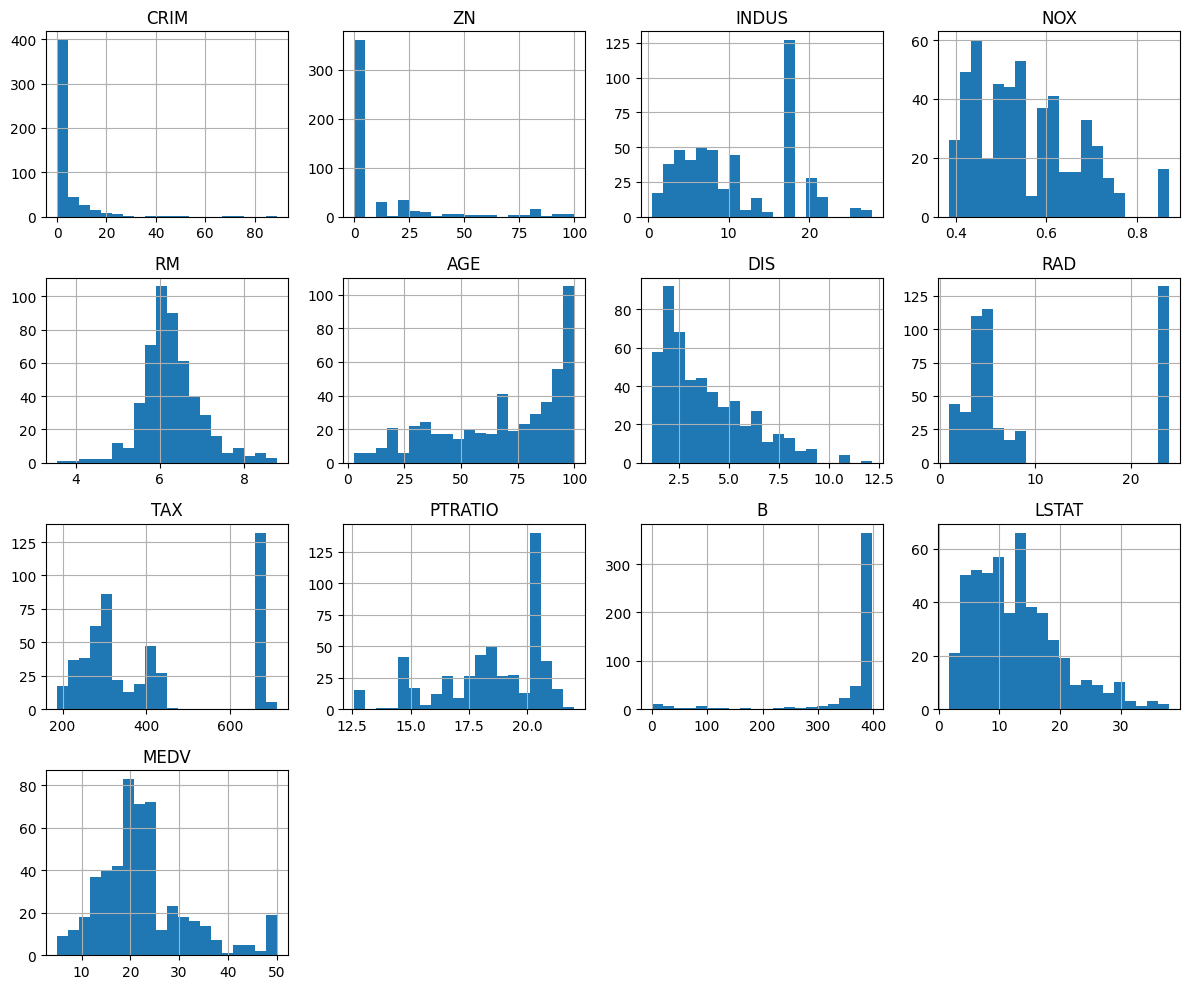

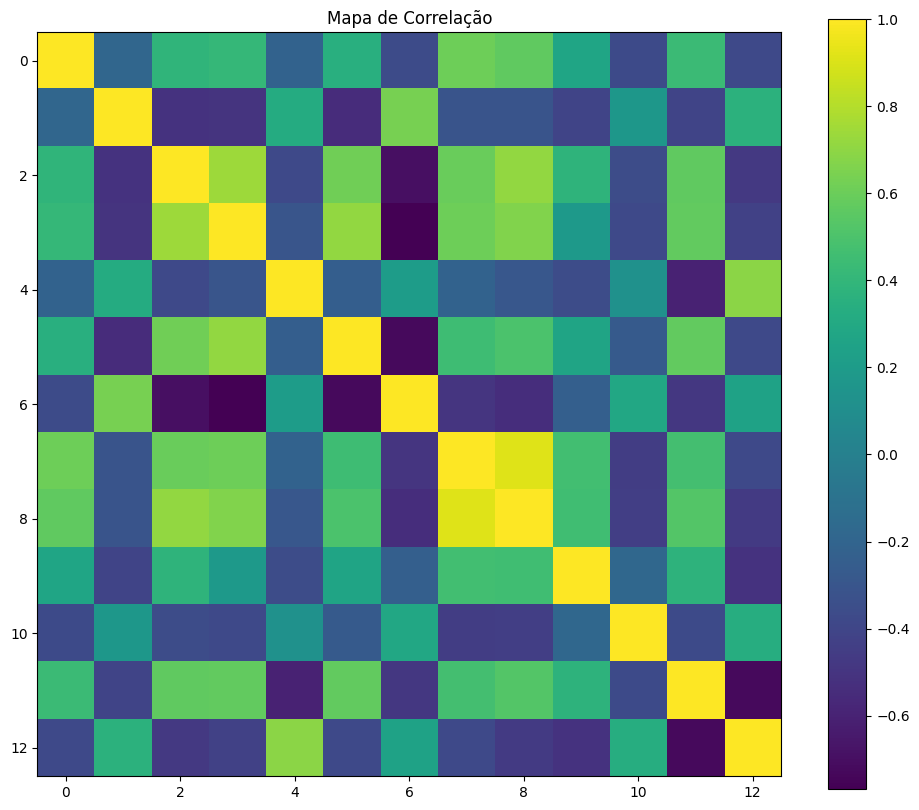

In [34]:
df.hist(bins=20, figsize=(12,10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
plt.imshow(df.corr(), cmap='viridis')
plt.colorbar()
plt.title("Mapa de Correlação")
plt.show()

In [35]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=[X_train_scaled.shape[1]]),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]
)

model.summary()

# Early stopping
early_stop = keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True
)

/home/luchesi/venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=400,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 625.1337 - mae: 23.1225 - val_loss: 554.3471 - val_mae: 21.9954
Epoch 2/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 606.4512 - mae: 22.6551 - val_loss: 536.7225 - val_mae: 21.5480
Epoch 3/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 578.3054 - mae: 21.9472 - val_loss: 491.5948 - val_mae: 20.4025
Epoch 4/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 506.5951 - mae: 20.1293 - val_loss: 385.0464 - val_mae: 17.5495
Epoch 5/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 348.3045 - mae: 15.9559 - val_loss: 193.0895 - val_mae: 11.7017
Epoch 6/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 141.1339 - mae: 9.5681 - val_loss: 55.0232 - val_mae: 5.1710
Epoch 7/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 65.4844 - mae: 6.1209 - val_loss: 37.7078 - val_mae: 3.9895
Epoch 8/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 40.7362 - mae: 4.6545 - val_loss: 32.1202 - val_mae: 3.6761
Epoch 9/400
21/21 ━━━

In [38]:
predictions = model.predict(X_test_scaled).flatten()

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x77e1284a94e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
MSE: 13.910841615260159
MAE: 2.476564044578403
R²: 0.8103078688188204


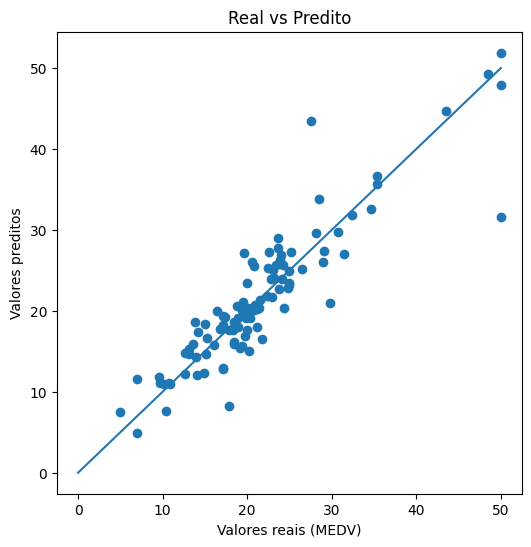

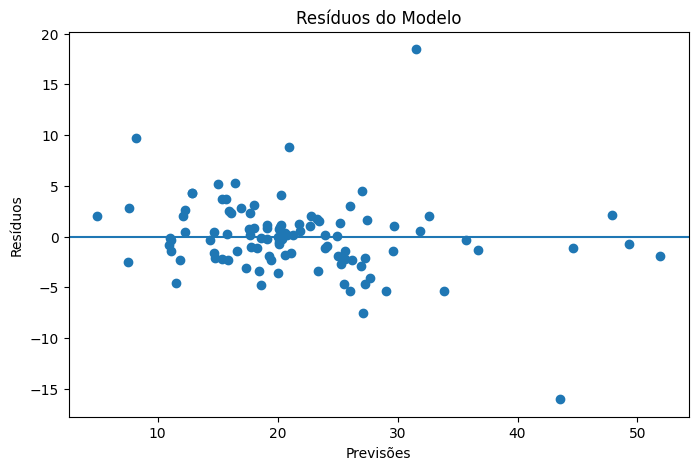

In [39]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, predictions)
plt.xlabel("Valores reais (MEDV)")
plt.ylabel("Valores preditos")
plt.title("Real vs Predito")
plt.plot([0, 50], [0, 50])
plt.show()

residuals = y_test - predictions

plt.figure(figsize=(8,5))
plt.scatter(predictions, residuals)
plt.axhline(0)
plt.xlabel("Previsões")
plt.ylabel("Resíduos")
plt.title("Resíduos do Modelo")
plt.show()